# Intro to Scikit Learn

## 0. end to end scikit workflow

In [32]:
import numpy as np

In [33]:
# 1. get data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
# create x (features matrix)
x = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]

In [35]:
# import warnings
# warnings.filterwarnings("ignore")

In [36]:
# 2. choose right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
# import sklearn
# sklearn.show_versions()

In [38]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [39]:
clf.fit(X_train,Y_train);

In [40]:
# make a prediction
# y_label = clf.predict(np.array([0,2,3,4]))

In [41]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [42]:
# 4. evaluate the model on the training data and test data
clf.score(X_train,Y_train)

1.0

In [43]:
clf.score(X_test,Y_test)

0.8852459016393442

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [45]:
confusion_matrix(Y_test, y_preds)

array([[26,  4],
       [ 3, 28]], dtype=int64)

In [46]:
accuracy_score(Y_test, y_preds)

0.8852459016393442

In [47]:
# 5. improve a model
# try different amount of n-estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 86.89%

Trying model with 50 estimators...
Model accuracy on test set: 83.61%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [48]:
# 6. save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [49]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8032786885245902

## 1. gettind data ready to be used with machine learning
Three main things we have to do:
    1. Split the data into features and labels (ussually x an y)
    2. filling (also called inputing) or disregard missing values
    3. converting non-numeriacal values to numerical values (also called feature encoding)

In [50]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [53]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [55]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [57]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape, x.shape

((242, 13), (61, 13), (242,), (61,), (303, 13))

### 1.1 make sure is all numerical

In [59]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [60]:
# split into x/y
x= car_sales.drop("Price", axis=1)
y= car_sales["Price"]

# split into training and testing
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [61]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [65]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(x)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [66]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [67]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [68]:
# refit the model
np.random.seed(42)
x_train,x_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3235867221569877

### 1.2 what if there were missing values
1. fill with some values (imputation)
2. remove values with missing data

In [98]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [99]:
# split into x/y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [100]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [101]:
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(x)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### option 1: fill missing data with pandas

In [102]:
# fill make column
car_sales_missing["Make"].fillna("missing", inplace=True)
# fill colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)
# fill doors column
car_sales_missing["Doors"].fillna(4, inplace=True)
# fill odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
# fill price column
# car_sales_missing["Price"].fillna(car_sales_missing["Price"].mean(), inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [103]:
# remove rows with missing price
car_sales_missing.dropna(inplace=True)

In [104]:
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [105]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [106]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2: fill missing values with scikitlearn

In [109]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [110]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [111]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [112]:
# split into x and y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [115]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_feaures = ["Make", "Colour"]
door_feaures = ["Doors"]
num_feaures = ["Odometer (KM)"]

# create inouter, fills missing data
inputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_feaures),
    ("door_imputer", door_imputer, door_feaures),
    ("num_imputer", num_imputer, num_feaures)
])

# transform data
filled_x = inputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [118]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [119]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [121]:
# now data is as numbers and filled (no missing vlaues)
# fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. choosing the right estimator/algorithm for your problem
Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
* Regression problem - predicting a number

### 2.1 Picking a machine learning model for a regression problem
let's use the california housing data set

In [124]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [127]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [130]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [132]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [133]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5758549611440128

In [134]:
# using a different model - ensemble model
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

### 2.1 Picking a machine learning model for a classification problem

In [137]:
# import linear svc stimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8688524590163934

In [138]:
# import Random forest Classifier stimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

## 3. fit the model on our data and use it to make predictions
### 3.1 fitting model to the data
x = features, feature variables
y = labels, target

In [139]:
# import Random forest Classifier stimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
clf = RandomForestClassifier()

# fit model to data
clf.fit(x_train,y_train)

# evaluate model
clf.score(x_test,y_test)

0.8524590163934426

### 3.2 make predictions using a machine learning model
1. predict()
2. predict_proba()

In [140]:
# use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [141]:
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [142]:
clf.score(x_test,y_test)

0.8524590163934426

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

## make predictions with predict_proba()

In [146]:
# make predictions with predict_proba()
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [147]:
# predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

# predict() for regression models

In [148]:
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)

In [149]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [152]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [153]:
# compare preds to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [154]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. evaluating a model
1. estimators built in score
2. scoring parameter
3. problem specific metric fundtion

### 4.1 evaluating a model with score method

In [155]:
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
clf = RandomForestClassifier()

# fit model to data
clf.fit(x_train,y_train)

# evaluate model
clf.score(x_test,y_test)

0.8524590163934426

## 4.2 using scoring parameter

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
clf = RandomForestClassifier()

# fit model to data
clf.fit(x_train,y_train);

In [158]:
clf.score(x_test,y_test)

0.8524590163934426

In [159]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [160]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test,y_test)

# take mean of cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 classification model evaluation metrics
1. accuracy
2. area under ROC curve
3. confusion matrix
4. classification report

Accuracy

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"] # median house price in 1000000

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model
clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf,x,y)

In [163]:
 np.mean(cross_val_score)

0.8215300546448088

In [164]:
print(f"accuracy: { np.mean(cross_val_score) * 100:.2f}%")

accuracy: 82.15%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under Curve AUC
* ROC curve (comparison of a model's true positive rate (tpr) versus model false positive (fpr))

In [167]:
from sklearn.metrics import roc_curve

# fit
clf.fit(x_train,y_train);

# make predictions with probabilities
y_probs = clf.predict_proba(x_test)

# keep
y_probs[:10]

array([[0.92, 0.08],
       [0.36, 0.64],
       [0.52, 0.48],
       [0.9 , 0.1 ],
       [0.19, 0.81],
       [0.17, 0.83],
       [0.27, 0.73],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.42, 0.58]])

In [169]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.08, 0.64, 0.48, 0.1 , 0.81, 0.83, 0.73, 0.07, 0.07, 0.58, 0.83,
       0.29, 0.96, 0.07, 0.98, 0.98, 0.99, 0.09, 0.04, 0.05, 0.56, 0.07,
       0.65, 0.82, 0.74, 0.63, 0.73, 0.73, 0.15, 0.78, 0.12, 0.06, 0.02,
       0.43, 0.57, 0.08, 0.54, 0.81, 0.6 , 0.88, 0.87, 0.71, 0.79, 0.68,
       0.65, 0.26, 0.61, 0.99, 0.2 , 0.03, 0.18, 0.19, 0.77, 0.77, 0.15,
       0.04, 0.36, 0.96, 0.17, 0.01, 0.17])

In [170]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check false positive
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.06896552, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.34482759, 0.48275862, 0.48275862,
       0.55172414, 0.62068966, 0.75862069, 0.82758621, 0.89655172,
       1.        ])

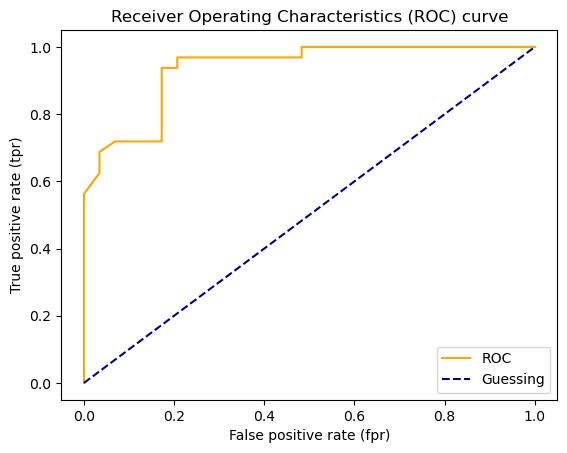

In [171]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the false positive (fpr) and true positive rate (tpr)
    """
    # plot ROC curve
    plt.plot(fpr,tpr,color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [172]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9358836206896552